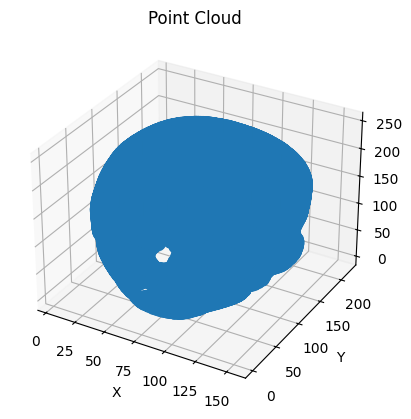

In [3]:
# osnovna verzija

import numpy as np
import matplotlib.pyplot as plt


def showPointCloud(point_cloud):
    # Extract x, y, and z coordinates from the glava variable
    x = point_cloud[:, 0]
    y = point_cloud[:, 1]
    z = point_cloud[:, 2]

    # Create a 3D scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Point Cloud')

    # Show the plot
    plt.show()

if __name__ == "__main__":
    # nalozi testno obliko
    glave = np.load('data/glave.npy', allow_pickle=True)
    glava = np.array(glave[0], dtype='float')
    showPointCloud(glava)




In [4]:
import matplotlib.pyplot as plt
%matplotlib widget

def create_mesh(point_cloud, downsample = 2):
    # downsample the point cloud
    point_cloud = point_cloud[::downsample]

    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(point_cloud)
    pcd.estimate_normals()

    # to obtain a consistent normal orientation
    pcd.orient_normals_towards_camera_location(pcd.get_center())

    # or you might want to flip the normals to make them point outward, not mandatory
    pcd.normals = o3d.utility.Vector3dVector( - np.asarray(pcd.normals))

    # surface reconstruction using Poisson reconstruction
    mesh, _ = o3d.geometry.TriangleMesh.create_from_point_cloud_poisson(pcd, depth=9)

    # paint uniform color to better visualize, not mandatory
    mesh.paint_uniform_color(np.array([0.7, 0.7, 0.7]))

    return mesh

def showMesh(mesh):
    vertices = np.array(mesh.vertices)
    triangles = np.array(mesh.triangles)
    # Plot the 3D mesh
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_trisurf(vertices[:, 0], vertices[:, 1], triangles, vertices[:, 2], shade=True, color='grey')

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Mesh')

    # Show the plot
    plt.show()


if __name__ == "__main__":
    # nalozi testno obliko
    glave = np.load('data/glave.npy', allow_pickle=True)
    glava = np.array(glave[0], dtype='float')
    mesh = create_mesh(glava, downsample=20)
    showMesh(mesh)


ModuleNotFoundError: No module named 'ipympl'